In [54]:
import pandas as pd
from lxml import etree
import matplotlib.pyplot as plt


In [ ]:
# 1. Parse XML Data and Create a DataFrame (extracts customer, order, and item details)
tree = etree.parse('Data/customers_orders.xml')
items = tree.xpath('//Item')

data = []
for item in items:
    data.append({
        'CustomerID': item.xpath('ancestor::Customer/CustomerID/text()')[0],
        'Name': item.xpath('ancestor::Customer/Name/text()')[0],
        'Email': item.xpath('ancestor::Customer/Email/text()')[0],
        'OrderID': item.xpath('ancestor::Order/OrderID/text()')[0],
        'OrderDate': item.xpath('ancestor::Order/OrderDate/text()')[0],
        'ProductID': item.find('ProductID').text,
        'ProductName': item.find('ProductName').text,
        'Price': float(item.find('Price').text),
        'Quantity': int(item.find('Quantity').text)
    })

df = pd.DataFrame(data)
df

,CustomerID,Name,Email,OrderID,OrderDate,ProductID,ProductName,Price,Quantity
0,001,John Doe,johndoe@example.com,1001,2025-01-01,P001,Laptop,1200.0,1
1,001,John Doe,johndoe@example.com,1001,2025-01-01,P002,Mouse,25.0,2
2,001,John Doe,johndoe@example.com,1002,2025-01-05,P003,Monitor,300.0,1
3,002,Jane Smith,janesmith@example.com,1003,2025-01-07,P004,Tablet,500.0,1


In [56]:
# 2. Calculate total revenue per customer
revenue_per_customer = df.groupby('CustomerID').agg(TotalRevenue=('Price',lambda x : (x * df['Quantity'][x.index]).sum())).reset_index()
revenue_per_customer

,CustomerID,TotalRevenue
0,001,1550.0
1,002,500.0


In [57]:
# 3. Identify top products by total revenue
top_products = df.groupby('ProductName').agg(TotalRevenue=('Price',lambda x : (x * df['Quantity'][x.index]).sum())
                                                     ).reset_index().sort_values(by='TotalRevenue', ascending=False).head(3)
top_products

,ProductName,TotalRevenue
0,Laptop,1200.0
3,Tablet,500.0
1,Monitor,300.0


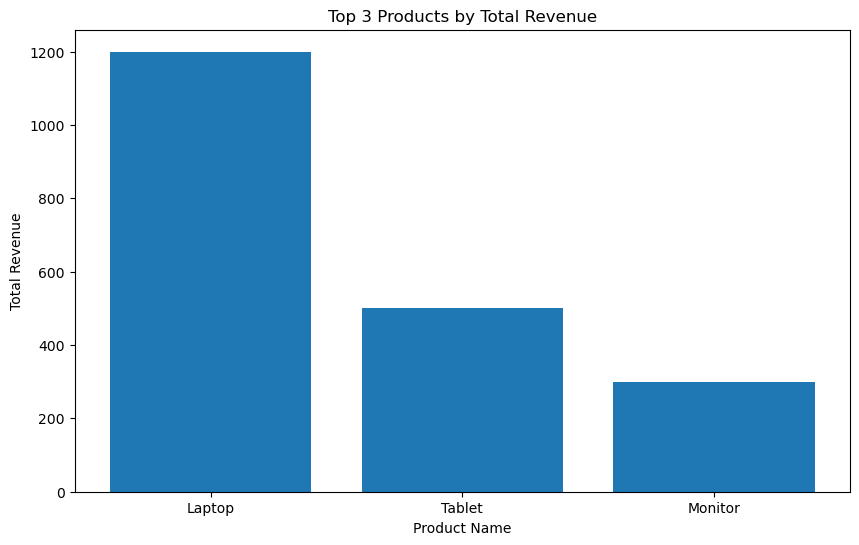

In [58]:
# 4. Visualize the top 3 products and their revenues using a bar chart.
plt.figure(figsize=(10, 6))
plt.bar(top_products['ProductName'], top_products['TotalRevenue'])
plt.title('Top 3 Products by Total Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.show()